**Names of all group members:**


---

All code below is only suggestive and you may as well use different approaches.

## 1.

Let $m=20000, n=10000$ and simulate $m+n$ vectors $x_i=(x_{i1},x_{i2},x_{i3})\in\mathbb{R}^3$, $i=1,\ldots,m+n$, with

* $x_{i1}$ = age in $[18,80]$ (from the continuous uniform distribution)
* $x_{i2}$ = monthly income in CHF 1000 in $[1,15]$ (from the continuous uniform distribution)
* $x_{i3}$ = salaried/self-employed in ${0,1}$, where $0$ = salaried and $1$ = self-employed (probability of being self-employed is $10%$)

such that $x_{i1}, x_{i2}, x_{i3}$ are independent.


### 1.a
Compute the empirical means and standard deviations of $x_{i1}, x_{i2}$ and $x_{i3}$ over $i = 1, \ldots, m$.


In [1]:
# Exercise 1.
import numpy as np
np.random.seed(0)  # for reproducibility

# simulate explanatory variables x (the age and monthly income are assumed here to follow a continous uniform distribution)
m = 20_000
n = 10_000

a1,b1 = 18,80
x1 = np.random.uniform(a1,b1,m+n) # age

a2,b2 = 1,15
x2 = np.random.uniform(a2,b2,m+n) # monthly income in 1'000 CHF

p = 0.1
x3 = np.random.binomial(1,p,m+n) # salaried/self-employed with x3~bern(p) with p = 0.1

x1_subs = x1[0:m]
x2_subs = x2[0:m]
x3_subs = x3[0:m]


Let's quickly derive the first two moments for comparison purposes.

Suppose $Y \sim Uniform(a,b)$. Then

$$\mathbb{E}\left[Y\right] = \int_{a}^{b} y \frac{1}{b-a} \,dy = \frac{b^2-a^2}{2(b-a)} = \frac{b+a}{2}$$

$$\mathbb{E}\left[Y^2\right] = \int_{a}^{b} y^2 \frac{1}{b-a} \,dy = \frac{b^3-a^3}{3(b-a)} = \frac{(b+a)^2-ab}{3}$$

$$\text{Var}\left[Y\right] = \mathbb{E}\left[Y^2\right]-\mathbb{E}\left[Y\right]^2 = \frac{(b+a)^2-ab}{3} - \frac{(b+a)^2}{4} = \frac{(b-a)^2}{12}$$

$$\sigma_Y = \sqrt{\frac{(b-a)^2}{12}}$$

For $X_1 \sim Uniform(18,80)$:

$$\mathbb{E}\left[X_1\right] = \frac{80+18}{2} = 49 \text{,} \quad \text{Var}\left[X_1\right] =  \frac{961}{3} = 320.\bar{3} \text{,} \quad \sigma_{X_1} = \sqrt{961/3} \approx  17.898 $$

and for $X_2 \sim Uniform(1,15)$:

$$\mathbb{E}\left[X_2\right] = \frac{1+15}{2} = 8\text{,} \quad\text{Var}\left[X_2\right] = \frac{(15-1)^2}{12} = \frac{49}{3} = 16.\bar{3}, \quad \sigma_{X_2} = \sqrt{49/3} \approx  4.041 $$

Suppose $B \sim Bern(p)$. Then

$$\mathbb{E}\left[B\right] = \sum_{k\in S_B = \{0,1\}} b p^k (1-p)^{1-k} = p $$

$$\mathbb{E}\left[B^2\right] = \sum_{k\in \{0,1\}} b^2 p^k (1-p)^{1-k} = p $$

$$\text{Var}\left[B\right] = \mathbb{E}\left[B^2\right]-\mathbb{E}\left[B\right]^2 = p-p^2 = p(1-p)$$

$$\sigma_B = \sqrt{p(1-p)}$$

For $X_3\sim Bern(0.1)$:

$$\mathbb{E}\left[X_3\right] = 0.1 \text{,} \quad \text{Var}\left[X_3\right] = 0.09 \text{,} \quad \sigma_{X_3} = 0.3 $$


In [2]:
def empirical_stat(x,dist=[]):
    mean = x.mean()
    s = x.std(ddof=1) # bias corrected df = 1 i.e. 1/(n-1)

    if len(dist) == 3:
        if dist[0] == "Uniform":
            a,b = dist[1]
            mu = (b+a) / 2
            var = (b-a)**2 / 12
            sigma = np.sqrt(var)
        elif dist[0] == "Bernoulli":
            p = dist[1]
            mu = p
            var = p*(1-p)
            sigma = np.sqrt(var)
        else:
            return mean, s
        rm = np.abs((mean-mu)/mu)*100
        s_n = x.std() # by default df = 0 i.e. 1/n
        
        sr_n = np.abs((sigma-s_n)/sigma)*100
        sr = np.abs((sigma-s)/sigma)*100


        disp_str = "\n----- Comparison: empirical and true statistics -----\n"
        disp_str += f"{dist[2]}~{dist[0]}({dist[1]})\n\n"
        disp_str += f" Mean: \n\tTrue mean = {round(mu,3)}, Empirical mean = {round(mean,3)}"
        disp_str += f"\n\tDifference = {round(np.abs(mean-mu),3)} ({round(rm,3)}%)"

        disp_str += f"\n\n Standard deviation: \n\tTrue standard devitation = {round(sigma,3)}"
        disp_str += f"\n\t Population standard deviation:"
        disp_str += f"\n\t  Value = {round(s_n,3)}"
        disp_str += f", Difference = {round(np.abs(s_n-sigma),3)} ({round(sr_n,3)}%)"

        disp_str += f"\n\t Sample standard deviation:"
        disp_str += f"\n\t  Value = {round(s,3)}"
        disp_str += f", Difference = {round(np.abs(s-sigma),3)} ({round(sr,3)}%)"

        disp_str += "\n" + "-"*len("----- Comparison: empirical and true statistics -----")

        print(disp_str)
   
    return mean,s

    


## Using inbuilt functions
x1_subs_mean, x1_subs_std = empirical_stat(x1_subs,["Uniform",(a1,b1),"X1"])

x2_subs_mean, x2_subs_std = empirical_stat(x2_subs,["Uniform",(a2,b2),"X2"])

x3_subs_mean, x3_subs_std = empirical_stat(x3_subs,["Bernoulli",p,"X3"])



----- Comparison: empirical and true statistics -----
X1~Uniform((18, 80))

 Mean: 
	True mean = 49.0, Empirical mean = 48.743
	Difference = 0.257 (0.525%)

 Standard deviation: 
	True standard devitation = 17.898
	 Population standard deviation:
	  Value = 18.007, Difference = 0.11 (0.612%)
	 Sample standard deviation:
	  Value = 18.008, Difference = 0.11 (0.615%)
-----------------------------------------------------

----- Comparison: empirical and true statistics -----
X2~Uniform((1, 15))

 Mean: 
	True mean = 8.0, Empirical mean = 7.987
	Difference = 0.013 (0.168%)

 Standard deviation: 
	True standard devitation = 4.041
	 Population standard deviation:
	  Value = 4.031, Difference = 0.011 (0.263%)
	 Sample standard deviation:
	  Value = 4.031, Difference = 0.011 (0.261%)
-----------------------------------------------------

----- Comparison: empirical and true statistics -----
X3~Bernoulli(0.1)

 Mean: 
	True mean = 0.1, Empirical mean = 0.102
	Difference = 0.002 (1.7%)

 Standa

**Notes on the empirical standard devition**

As can be seen above the sample and population standard deviations yield to almost identical results, but why then just stick with one and not the other?


Suppose $\mu$ and $\sigma^2$ represent the true mean and variance respectfully, derived from some distribution $f_X$. If we were to estimate those measures purely based on observations. Then

$$\bar{X} = \frac{1}{n}\sum^n_{i=1} x_i \text{,}\quad\hat{\sigma}^2 = \frac{1}{n} \sum^n_{i=1}\left(x_i-\bar{X}\right)^2$$

Now if we take the expectations:

$$\mathbb{E}\left[\bar{X}\right] = \mathbb{E}\left[\frac{1}{n}\sum^n_{i=1} x_i \right] = \frac{1}{n}\sum^n_{i=1}\mathbb{E}\left[ x_i \right] = \mu$$

and 


$$\mathbb{E}\left[\hat{\sigma}^2 \right]= \mathbb{E}\left[\frac{1}{n} \sum^n_{i=1}\left(x_i-\bar{X}\right)^2\right] =  \frac{1}{n}\cdot\mathbb{E}\left[\sum^n_{i=1}\left(x_i-\mu-(\bar{X}-\mu)\right)^2\right]= \frac{1}{n}\cdot\mathbb{E}\left[\sum^n_{i=1}\left((x_i-\mu)^2+(\bar{X}-\mu)^2-2(\bar{X}-\mu)(x_i-\mu)\right)\right]$$

$$ = \frac{1}{n}\cdot\mathbb{E}\left[\sum^n_{i=1}(x_i-\mu)^2\right]-\frac{2}{n}\cdot\mathbb{E}\left[(\bar{X}-\mu)\sum^n_{i=1}\left(x_i -\mu\right)\right] + \mathbb{E}\left[(\bar{X}-\mu)^2\right]
= \frac{1}{n}\cdot\mathbb{E}\left[\sum^n_{i=1}(x_i-\mu)^2\right] - \mathbb{E}\left[(\bar{X}-\mu)^2\right] = \sigma^2 - \frac{\sigma^2}{n} = \frac{n-1}{n}\sigma^2$$

hence we need to correct for the bias of $n-1$ and define the unbiased estimator:

$$\tilde{\sigma}^2 = \frac{1}{n-1} \sum^n_{i=1}\left(x_i-\bar{X}\right)^2$$

which, is in fact the definition of the sample variance. Taking the square root gives the sample standard deviation which is a still biased estimator for $\sigma$ but Bessel-correct, which we will consider to be sufficient (as long as n is relatively large).





### 1.b  
**Can you think of additional features (besides age, income, salaried/self-employed) that could be relevant in reality?**


Based on intution and past experiance we suggest the following:

- Loan amount

    This should be very relevant, especially in contrast to the salary. 
    Suppose the two extremes:
    
    Individual A is 50 years old, has a salary of 13'000 CHF a month and is obligated to pay off a loan of 10'000 CHF, here it should be rather obvious that the PD (probability of default) should be $\approx 0$, hence the exposure is neglible. Especially if the payment is not due until much later or spread over a long period.

    Individual B is 50 years old, has a salary of 3'000 CHF a month and is obligated to pay off a loan of 500'000 CHF, here it does not seem as obvious how the individual is supposed to pay off the loan. If we assume that the individual has no other financial obligations, pays no taxes and the cost of the loan is zero then it would still take him almost 14 years to simply gather the principal amount. If we consider interest rates, which would accumulated, it would be even harder for the individual to pay off the loan.

- Loan term
    
    This is somewhat self-explanatory, the nature of the loan is what should matter. Take individual B again, what if he is obligated to pay off the loan in 30 years compared to only 10. The PD will by effected by this feature, hence it should be included.

- Interest rates

    Again, this is somewhat self-explanatory, the cost of the loan matters. Take a new individual C, suppose he is 39 years old, has a salary of 5'000 CHF a month and is obligated to pay off a loan of 200'000 CHF over a period of 20 years, seems reasonable. But, what if bearing yearly compounded interest rates were 18%? the total amount that will be paid in the end is astronomically higher the principal, whereas the accumulated amount will not multiply as often for slightly lower interest rates. Hence, this feature should be considered to be relevant.

- Credit history

    If we had access to the individuals' default history it should seem rather obvious that the relationship between defaulting once or more should be strongly linked to the probability of defaulting again. One could argue that an individual with a long history of meeting obligations should be compensated. This could potentially be a feature with two subfeatures or more. For instance, tracking the number of defaults, the number months of active obligations, number of such obligations etc.

- Loan type

    The purpose would be to distinguish between overdraft, mortgage, student loans, auto loans etc. This could already be somewhat reflected in the aforementioned features, yet one could argue against it. Suppose there are two individuals with identical (risk) profiles and further assume all other features are equal, if one was using the borrowed amount to finance a house while the other was using the amount to purchase very volatile cryptocurrency, it is obvious the inviduals should not get equal PD values.




## 2.
Let $\xi_i,\ i=1,\ldots,m+n$ be independent random variables that are uniformly distributed on $(0,1)$ and $\psi:\mathbb{R}\to(0,1)$ the logistic (or sigmoid) function given by

$$
\psi(z) = \frac{e^{z}}{1 + e^{z}} = \frac{1}{1 + e^{-z}}.
$$

Consider two functions $p_1, p_2: \mathbb{R}^3 \to (0,1)$ of the form

$$
p_1(x_i) = \psi(13.3 - 0.33x_{i1} + 3.5x_{i2} - 3x_{i3})
$$

$$
p_2(x_i) = \psi\big(5 - 10[\mathbf{1}_{(-\infty,25)}(x_{i1}) + \mathbf{1}_{(75,\infty)}(x_{i1})] + 1.1x_{i2} - x_{i3}\big)
$$

and generate two artificial data sets $(x_i, y_i^{(1)})$ and $(x_i, y_i^{(2)})$, $i = 1, \ldots, m + n$, by setting

$$
y_i^{(1)} =
\begin{cases}
1 & \text{if } \xi_i \le p_1(x_i), \
0 & \text{otherwise,}
\end{cases}
\qquad
y_i^{(2)} =
\begin{cases}
1 & \text{if } \xi_i \le p_2(x_i), \
0 & \text{otherwise.}
\end{cases}
$$

(We use the convention that $y_i^{(s)} = 1$ is a good borrower whereas $y_i^{(s)} = 0$ is a delinquent borrower.
That is, $p_1$ and $p_2$ are the conditional probabilities that loans will be paid back in the two data generating regimes.)

For both data sets, $s = 1, 2$, do the following:


In [3]:
# Exercise 2.
# Building the datasets:

sigmoid = lambda x: 1. / (1. + np.exp(-x))

eps = np.random.uniform(0,1,m+n)

p1 = lambda x1,x2,x3 : sigmoid(13.3-0.33*x1+3.5*x2-3*x3)
p2 = lambda x1,x2,x3 : sigmoid(5-10*((x1<25)+(x1>75))+1.1*x2-x3)

# build the first dataset
y1 = (eps<=p1(x1,x2,x3)).astype(int)

# build the second dataset
y2 = (eps<=p2(x1,x2,x3)).astype(int)

y1_train,y1_test = y1[0:m],y1[m:n+m]

y2_train,y2_test = y2[0:m],y2[m:n+m]
x = np.stack((x1,x2,x3),axis=1) # fit takes (n+m,d)



x_train,x_test = x[0:m],x[m:n+m]


### 2.a
Fit a logistic regression model $\hat{p}^{\mathrm{log}}_s:,\mathbb{R}^3 \to (0,1)$ on the training data $(x_i, y_i^{(s)}),\ i=1,\ldots,m$. Calculate the cross-entropy loss of $\hat{p}^{\mathrm{log}}_s$ on the training and test data. You can use the function `sklearn.linear_model.LogisticRegression` for this.


In [4]:
# Exercise 2. a)
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
model1 = LogisticRegression().fit(x_train, y1_train)
model2 = LogisticRegression().fit(x_train, y2_train)

theta = 0.5
def class_assign(y_p,threshold=theta):
    return (y_p[:,1]>threshold).astype(int)

y1_hat_train_p,y1_hat_test_p = model1.predict_proba(x_train),model1.predict_proba(x_test)
y2_hat_train_p,y2_hat_test_p = model2.predict_proba(x_train),model2.predict_proba(x_test)

y1_hat_train, y1_hat_test = class_assign(y1_hat_train_p),class_assign(y1_hat_test_p)
y2_hat_train, y2_hat_test = class_assign(y2_hat_train_p),class_assign(y2_hat_test_p)


**Notes on binary cross-entropy loss**

The binary cross-entropy or log loss is defined as:
$$\mathcal{L}(y;p) = -\frac{1}{n}\sum_{i=1}^n (y_i\ln(p_i)+(1-y_i)\ln(1-p_i))$$

now if we define the probability of assigned to the true class

$$p_i^{true}= \begin{cases}p_i, &  y_i = 1 \\ 1-p_i, &  y_i = 0\end{cases}$$

then 

$$ -\frac{1}{n}\sum_{i=1}^n (y_i\ln(p_i)+(1-y_i)\ln(1-p_i)) = -\frac{1}{n}\sum_{i=1}^n \ln(p_i^{true})$$

and take the negative exponential

$$\exp(-\mathcal{L}(y;p)) = \exp\left(\frac{1}{n}\sum_{i=1}^n \ln(p_i^{true})\right) = \left(\prod_{i=1}^n p_i^{true}\right)^{1/n} $$

then we have the geometric mean of the probabilities that model assigned a true label to the data, so roughly speaking it represents the confidence the model has in assigning to the true class.



In [5]:
# Class split counts
def splits(y):
    good, bad = sum((y==1)), sum((y==0))
    c_g = good / (good+bad)
    c_b = bad / (good+bad)
    return c_g,c_b


def comparison(y1_train,y1_test,y2_train,y2_test,
               y1_hat_train,y1_hat_test,y2_hat_train,y2_hat_test,
               y1_hat_train_p,y1_hat_test_p,y2_hat_train_p,y2_hat_test_p,
               show=True):
    

    loss1_train,loss1_test = log_loss(y_true=y1_train,y_pred=y1_hat_train_p),log_loss(y_true=y1_test,y_pred=y1_hat_test_p)
    loss2_train,loss2_test = log_loss(y_true=y2_train,y_pred=y2_hat_train_p),log_loss(y_true=y2_test,y_pred=y2_hat_test_p)

    if show:
        c1_train,c1_test = splits(y1_train),splits(y1_test)
        c2_train,c2_test = splits(y2_train),splits(y2_test)
        c1_hat_train,c1_hat_test = splits(y1_hat_train),splits(y1_hat_test)
        c2_hat_train,c2_hat_test = splits(y2_hat_train),splits(y2_hat_test)

        loss_str = "\n----- Comparison: train and test loss -----\n"
        loss_str += "p1:\n"
        loss_str += "  Loss:\n"
        loss_str += f"\ttrain = {loss1_train:.3e}, test = {loss1_test:.3e}\n"
        loss_str += "  Confidence:\n"
        loss_str += f"\ttrain = {np.exp(-loss1_train):.3f}, test = {np.exp(-loss1_test):.3f}\n"
        loss_str += f"  Class Balance (at threshold={theta}):\n"
        loss_str += f"\t train:" 
        loss_str += f"\t  True: {c1_train}, Prediction: {c1_hat_train}\n" 
        loss_str += f"\t test:" 
        loss_str += f"\t  True: {c1_test}, Prediction: {c1_hat_test}\n" 

        loss_str += "p2:\n"
        loss_str += "  Loss:\n"
        loss_str += f"\ttrain = {loss2_train:.3e}, test = {loss2_test:.3e}\n"
        loss_str += "  Confidence:\n"
        loss_str += f"\ttrain = {np.exp(-loss2_train):.3f}, test = {np.exp(-loss2_test):.3f}\n"
        loss_str += f"  Class Balance (at threshold={theta}):\n"
        loss_str += f"\t train:" 
        loss_str += f"\t  True: {c2_train}, Prediction: {c2_hat_train}\n" 
        loss_str += f"\t test:" 
        loss_str += f"\t  True: {c2_test}, Prediction: {c2_hat_test}" 
        loss_str += "\n" + "-"*len("----- Comparison: train and test loss -----")

        print(loss_str)
    return loss1_train,loss1_test,loss2_train,loss2_test

loss1_train,loss1_test,loss2_train,loss2_test = comparison(y1_train,y1_test,y2_train,y2_test,
               y1_hat_train,y1_hat_test,y2_hat_train,y2_hat_test,
               y1_hat_train_p,y1_hat_test_p,y2_hat_train_p,y2_hat_test_p)


----- Comparison: train and test loss -----
p1:
  Loss:
	train = 2.965e-02, test = 3.486e-02
  Confidence:
	train = 0.971, test = 0.966
  Class Balance (at threshold=0.5):
	 train:	  True: (0.9515, 0.0485), Prediction: (0.95295, 0.04705)
	 test:	  True: (0.9523, 0.0477), Prediction: (0.9549, 0.0451)
p2:
  Loss:
	train = 1.535e-01, test = 1.486e-01
  Confidence:
	train = 0.858, test = 0.862
  Class Balance (at threshold=0.5):
	 train:	  True: (0.9482, 0.0518), Prediction: (1.0, 0.0)
	 test:	  True: (0.9513, 0.0487), Prediction: (1.0, 0.0)
-------------------------------------------


**Notes on the results (2.a)**

For dataset $s=1$ the loss and thus the confidence is reasonable, the model very clearly distinguishes between $y_i = 0$ and $y_i = 1$. This applies to both the training and the test loss, note the test loss is slightly higher, hence there might be marginal overfit (so small that it is neglible). Furthermore the (im)balance between classes is quite similar between the truth and the prediction, at the threshold decider of $\theta = 0.5$ (split in the middle). In short, it performs and generalizes rather well. It could serve reasonably well as a starting point.

In the case of dataset $s=2$ one might mistakenly take the confidence of $\approx 0.86$ as fine, (it is not!) since the classes are highly imbalanced, furthermore the loss is not great (in comparison to $s=1$). But, the results are "bad" across the training and test set, hence it generalizes. Just to point it out at this this threshold the model simply does one thing, picks the more frequent class. Which is far from what we want, even after some threshold optimization one should not use this model as it is (but more on that later). 

Suggestion:
- In both cases the imbalance will need to be treated specially

- In both cases we should to consider to standardize/scale/normalize the feature variables

- In $s=2$ we should strongly consider a more complex solution (note that even if we did not know that the underlying function which determines $y_2$ is less trivial than the one that determines $y_1$ we should still consider/recommend a more sophisticated approach)


### 2.b
For SVM classification, we denote by $\hat{\sigma}_j$ the empirical standard deviation of $(x_{ij})_{i=1}^m$ and work with the normalized data $\tilde{x}_{ij}=x_{ij}/\hat{\sigma}_j$ (for both training and evaluation).


In [6]:
x_tilde = np.stack((x1 / x1_subs_std,x2 / x2_subs_std,x3 / x3_subs_std),axis=1)
x_tilde_train, x_tilde_test = x_tilde[0:m],x_tilde[m:n+m]


#### 2.b (i) 
Fit a SVM $\hat f^{\mathrm{svm}}_s:\mathbb{R}^3\to\mathbb{R}$ of the form
$$
\hat f^{\mathrm{svm}}_s(x)=\langle w,\Phi(x)\rangle+b
$$
with feature map $\Phi$ on the training data using the hinge loss, kernel $k(x,x')=\exp\big(-\tfrac{1}{10}\lVert x-x'\rVert_2^2\big)$ and regularization parameter $\lambda=\tfrac{2}{5m}$. You can use the function `sklearn.svm.SVC` for this (the given choice of $\lambda$ corresponds to the parameter $C=\tfrac{1}{2\lambda m}=0.2$ in `sklearn.svm.SVC`).



In [7]:
# Exercise 2.b) (i) 
from sklearn.svm import SVC
C = 1/5
gamma = 1/10
model_s1 = SVC(kernel='rbf', gamma=gamma, C=C, probability=True)
model_s2 = SVC(kernel='rbf', gamma=gamma, C=C, probability=True)

#  creates a model with kernel exp(-GAMMA \|x-x'\|_2^2) and regul. parameter C (note the relation between C and the parameter lambda from the lecture).
# "probability=True" enables the option "model.predict_proba(X)" to predict probabilities from the regression function \hat{f}^{svm}.
# "model.fit(X, Y)" optimizes the model parameters (using hinge loss)
# Fit the models for both datasets (this can take up to 60 seconds with SVC)
model_s1.fit(x_tilde_train,y1_train)
model_s2.fit(x_tilde_train,y2_train)

SVC(C=0.2, gamma=0.1, probability=True)

#### 2.b (ii)
On top of $\hat f^{\mathrm{svm}}_s$, fit a logistic function $\hat g_s:\mathbb{R}\to(0,1)$ of the form
$$
\hat g_s(z)=\frac{1}{1+\exp(\alpha z+\beta)}
$$
for parameters $\alpha,\beta\in\mathbb{R}$ so that $\hat p^{\mathrm{svm}}_s:=\hat g_s\circ \hat f^{\mathrm{svm}}_s$ predicts conditional probabilities that loans are paid back; see Platt (1999). To this end, you may simply use the option `probability=True` in the `sklearn.svm.SVC` function.

In order obtain the calibrated probabilities $\hat{p}_s^{\text{svm}} = \hat{g}_s \circ \hat{f}^{\text{svm}}_s$  we fit logistic function

$$\hat{g}(z)=\frac{1}{1+\exp(\alpha z +\beta)},$$

where $\alpha,\beta$ are found by solving the following logistic regression problem:

$$\min_{\alpha,\beta} \sum \left( \{-y_i\ln(\hat{g}(\hat{f}_i))\} + \{(1-y_i)\ln(1-\hat{g}(\hat{f}_i))\} \right)  \leq 0$$

The solution to this corresponds to the maximum likelihood estimation of the sigmoid parameters, which ensure the SVM calibration. This is already included in the ``SVC`` class, therefore in practice we turn on the parameter ``probability=True``.


#### 2.b (iii) 
Compute the cross-entropy loss of $\hat p^{\mathrm{svm}}_s$, $s=1,2$, on both the normalized training and test data.


In [8]:
# Exercise 2.b (iii)
# "model.predict_proba(X)" predicts probabilities from features (note that it outputs both P(Y=0|X) and P(Y=1|X))
y1_hat_train_p_s,y1_hat_test_p_s = model_s1.predict_proba(x_tilde_train),model_s1.predict_proba(x_tilde_test)
y2_hat_train_p_s,y2_hat_test_p_s = model_s2.predict_proba(x_tilde_train),model_s2.predict_proba(x_tilde_test)

y1_hat_train_s, y1_hat_test_s = class_assign(y1_hat_train_p_s),class_assign(y1_hat_test_p_s)
y2_hat_train_s, y2_hat_test_s = class_assign(y2_hat_train_p_s),class_assign(y2_hat_test_p_s)


loss1_train_s,loss1_test_s,loss2_train_s,loss2_test_s = comparison(y1_train,y1_test,y2_train,y2_test,
               y1_hat_train_s,y1_hat_test_s,y2_hat_train_s,y2_hat_test_s,
               y1_hat_train_p_s,y1_hat_test_p_s,y2_hat_train_p_s,y2_hat_test_p_s)


# Calculate cross-entropy loss on both normalized datasets for train and test



----- Comparison: train and test loss -----
p1:
  Loss:
	train = 3.191e-02, test = 3.878e-02
  Confidence:
	train = 0.969, test = 0.962
  Class Balance (at threshold=0.5):
	 train:	  True: (0.9515, 0.0485), Prediction: (0.95225, 0.04775)
	 test:	  True: (0.9523, 0.0477), Prediction: (0.9543, 0.0457)
p2:
  Loss:
	train = 7.109e-02, test = 6.707e-02
  Confidence:
	train = 0.931, test = 0.935
  Class Balance (at threshold=0.5):
	 train:	  True: (0.9482, 0.0518), Prediction: (0.953, 0.047)
	 test:	  True: (0.9513, 0.0487), Prediction: (0.9549, 0.0451)
-------------------------------------------


**Notes on the results 2.b (iii)**

As shown above, the results for $s=2$ are significantly improved compared to the previous results (refer to the output below). As suggested earlier, a more sophisticated method is preferable for $s=2$ since the logistic regression tended to underfit, the use Support a Vector Machine yielded better results as the model is more intrigate. In contrast, the overall results are sligthly worse for $s=1$, where a mild overfit can be observed. Therefore, one could argue that the logistic regression was sufficiently complex for the case of $s=1$.



<small>

```julia
----- Comparison: train and test loss -----
p1:
  Loss:
	train = 2.965e-02, test = 3.486e-02
  Confidence:
	train = 0.971, test = 0.966
  Class Balance (at threshold=0.5):
	 train:	  True: (0.9515, 0.0485), Prediction: (0.95295, 0.04705)
	 test:	  True: (0.9523, 0.0477), Prediction: (0.9549, 0.0451)
p2:
  Loss:
	train = 1.535e-01, test = 1.486e-01
  Confidence:
	train = 0.858, test = 0.862
  Class Balance (at threshold=0.5):
	 train:	  True: (0.9482, 0.0518), Prediction: (1.0, 0.0)
	 test:	  True: (0.9513, 0.0487), Prediction: (1.0, 0.0)
-------------------------------------------
```

#### 2.b (iv) 
Would the results change if we used standardized data $\tilde z_{ij}=(x_{ij}-\hat\mu_j)/\hat\sigma_j$ instead of the normalized data $\tilde x_{ij}=x_{ij}/\hat\sigma_j$, with $\hat\mu_j$ the empirical mean of $(x_{ij})_{i=1}^m$? Explain why or why not.



It would not have any impact at all. 

*Proof:*

Let $\tilde{X} = \frac{X-\mu}{\sigma}$, and recall the kernel $K(X,X') = \exp\left(-\frac{1}{10}\| X-X' \|^2_2\right)$, and if we write it in terms of $\tilde{X}$ 

$$K(\tilde{X},\tilde{X}') = \exp\left(-\frac{1}{10}\| \tilde{X}-\tilde{X}' \|^2_2\right) = \exp\left(-\frac{1}{10}\left\| \frac{X-\mu}{\sigma}-\frac{X'-\mu}{\sigma}\right \|^2_2\right)= \exp\left(-\frac{1}{10}\left\| \frac{X-X'}{\sigma}\right \|^2_2\right)$$

Clearly, our new Kernel only depends on the $\sigma$ scaling and is indpendent of the shift factor $\mu$. $\blacksquare$

### 2.c
Generate FDR/TPR-curves and AUC from the test data for $\hat p^{\log}_s$ and $\hat p^{\mathrm{svm}}_s$.


In [14]:
# Exercise 2.c
import matplotlib.pyplot as plt
# To calculate the curves, it is fine to take 100 threshold values c, i.e.,
k = 455
ths = np.linspace(0, 1, k)

# To approximately calculate the AUC, it is fine to simply use Riemann sums.
# This means, if you have 100 (a_i, b_i) pairs for the curves, a_1 <= a_2 <= ...
# then you may simply use the sum
# sum_{i=1}^99 (b_i + b_{i+1})/2 * (a_{i+1}-a_i)
# as the approximation of the integral (or AUC)


def riemann_midpoint_sum(x,y):
    n = len(x)
    s = 0
    for i in range(n-1):
        delta = x[i+1]-x[i]
        mid = (y[i+1]+y[i])/2
        s+=mid*delta
    return s


def confusion_mat_base(y,y_hat):
    positive, negative = sum((y==1)), sum((y==0))

    tp = sum((y==1)&(y_hat==1))
    tn = sum((y==0)&(y_hat==0))
    fp = sum((y==0)&(y_hat==1))
    fn = sum((y==1)&(y_hat==0))
    fdr = fp/(tp+fp) if (tp+fp) !=0 else 0
    tpr = tp/(positive)  # recall
    fpr = fp/(negative)
    return positive,negative,tp,tn,fp,fn,fdr,tpr,fpr



def results(y,y_hat_p,thresholds=ths):
    y_res = {}
    y_hats = []
    confusion_base = {}
    p_list,n_list,tp_list,tn_list,fp_list,fn_list,fdr_list,tpr_list,fpr_list = [],[],[],[],[],[],[],[],[]
    for theta in thresholds[::-1]: # by definition we want to descend
        y_hat = class_assign(y_hat_p,theta)
        p,n,tp,tn,fp,fn,fdr,tpr,fpr = confusion_mat_base(y,y_hat)

        y_hats.append(y_hat)    
        p_list.append(p)
        n_list.append(n)
        tp_list.append(tp)
        tn_list.append(tn)
        fp_list.append(fp)
        fn_list.append(fn)
        fdr_list.append(fdr)
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    
    confusion_base["Postives"] = np.array(p_list)
    confusion_base["Negatives"] = np.array(n_list)
    confusion_base["TruePositive"] = np.array(tp_list)
    confusion_base["TrueNegative"] = np.array(tn_list)
    confusion_base["FalsePositive"] = np.array(fp_list)
    confusion_base["FalseNegative"] = np.array(fn_list)
    confusion_base["FalseDetectionRate"] = np.array(fdr_list)
    confusion_base["TruePositiveRate"] = np.array(tpr_list)
    confusion_base["FalsePositiveRate"] = np.array(fpr_list)
    confusion_base["ROC"] = riemann_midpoint_sum(fpr_list,tpr_list)
    confusion_base["AUC"] = riemann_midpoint_sum(tpr_list,fdr_list)
    y_res["ConfusionMatrixBase"] = confusion_base
    y_res["Predictions"] = np.array(y_hats)
    y_res["Loss"] = np.array(log_loss(y_true=y,y_pred=y_hat_p))

    return y_res

def result_binder(y_train,y_train_hat_p,y_test,y_test_hat_p,thresholds=ths):
    y_res = {}
    y_res["train"] = results(y_train,y_train_hat_p,thresholds)
    y_res["test"] = results(y_test,y_test_hat_p,thresholds)
    return y_res


y1_res = {}
y2_res = {}
y1_res["LogR"] = result_binder(y1_train,y1_hat_train_p,y1_test,y1_hat_test_p,ths)
y2_res["LogR"] = result_binder(y2_train,y2_hat_train_p,y2_test,y2_hat_test_p,ths)
y1_res["SVM"] = result_binder(y1_train,y1_hat_train_p_s,y1_test,y1_hat_test_p_s,ths)
y2_res["SVM"] = result_binder(y2_train,y2_hat_train_p_s,y2_test,y2_hat_test_p_s,ths)

Y_res = {}
Y_res["Y1"] = y1_res
Y_res["Y2"] = y2_res

# first data set & logistic regression:
# (the code should be reusable for all cases, only exchanging datasets and predicted probabilities depending on the model)

# Calculate positives (only depending on the dataset)

# Calculate true positives for all threshold values

# Calculate false positives for all threshold values

# Calculate FDR and TPR rate (points on the FDR/TPR curve) and the AUC


# second data set & logistic regression:


# first data set and rkhs regression:



# second data set and rkhs regression:

In [19]:
print((Y_res["Y1"]["LogR"]["test"]["ConfusionMatrixBase"]["FalseDetectionRate"]).shape)

(455,)


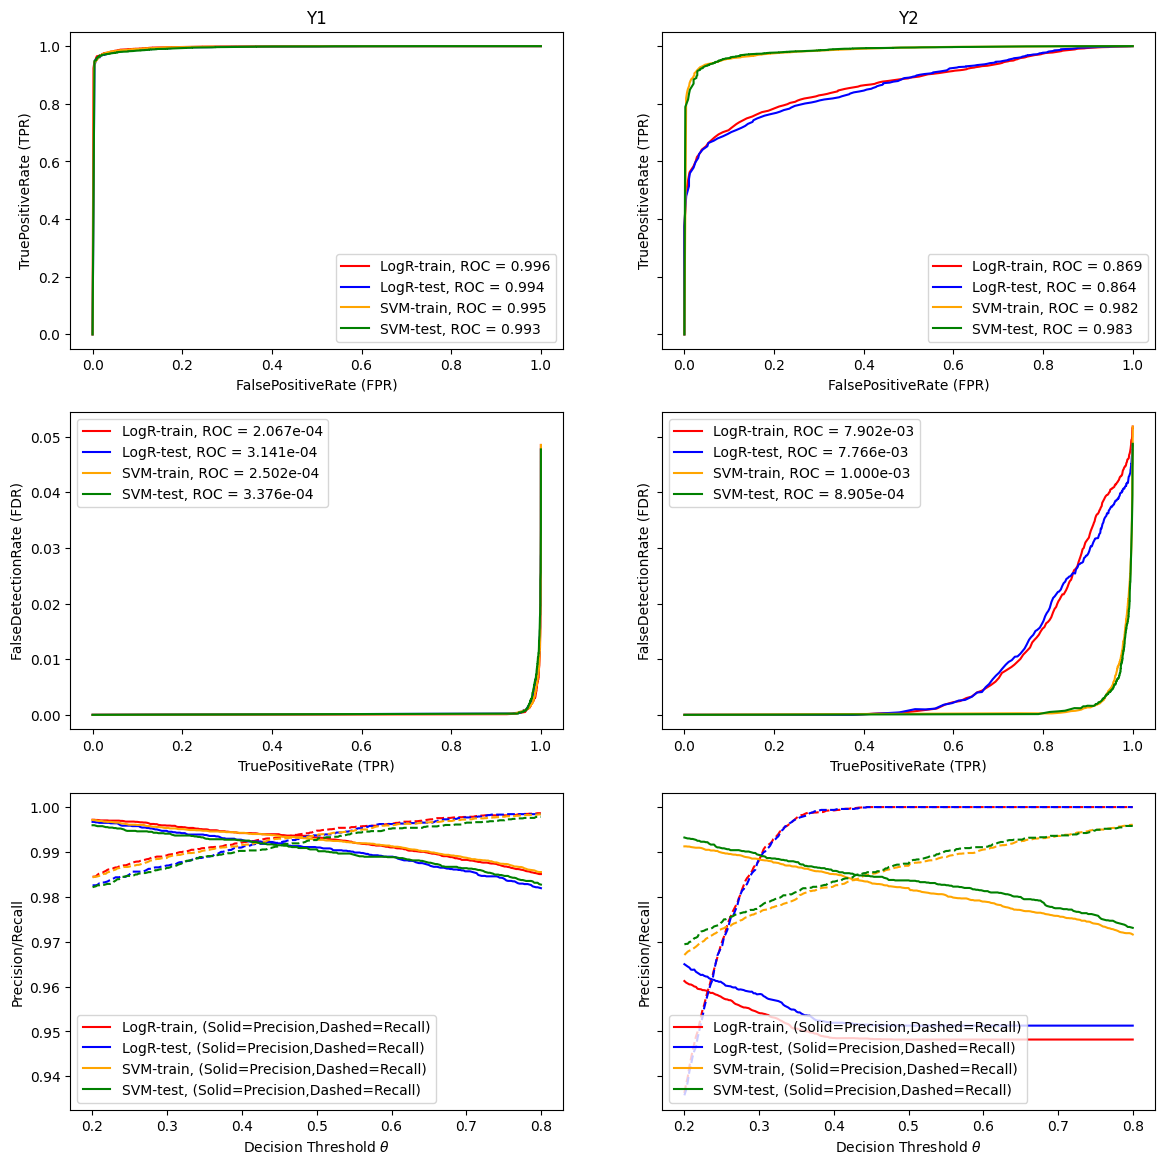

In [10]:
def plot_summary(Y_res):

    fig, axs = plt.subplots(3,2,figsize=(14,14),sharex='row', sharey='row')
    col = ["red","blue","orange","green"]
    
    j=0
    for parent_key in Y_res: 
        i = 0
        for model in Y_res[parent_key]:
            for set in Y_res[parent_key][model]:
                axs[0,j].plot(Y_res[parent_key][model][set]["ConfusionMatrixBase"]["FalsePositiveRate"],Y_res[parent_key][model][set]["ConfusionMatrixBase"]["TruePositiveRate"],
                            color = col[i] ,label=f"{model}-{set}, ROC = {round(Y_res[parent_key][model][set]['ConfusionMatrixBase']['ROC'],3)}")
                axs[1,j].plot(Y_res[parent_key][model][set]["ConfusionMatrixBase"]["TruePositiveRate"],Y_res[parent_key][model][set]["ConfusionMatrixBase"]["FalseDetectionRate"],
                            color = col[i] ,label=f"{model}-{set}, ROC = {Y_res[parent_key][model][set]['ConfusionMatrixBase']['AUC']:.3e}")
                cut_off = int(k*0.2) # show only for 0.2-0.8
                axs[2,j].plot(ths[cut_off:-cut_off],1-Y_res[parent_key][model][set]["ConfusionMatrixBase"]["FalseDetectionRate"][cut_off:-cut_off],
                              color = col[i], label=f"{model}-{set}, (Solid=Precision,Dashed=Recall)")
                axs[2,j].plot(ths[cut_off:-cut_off],Y_res[parent_key][model][set]["ConfusionMatrixBase"]["TruePositiveRate"][cut_off:-cut_off],'--',
                              color = col[i])  
                i+=1
            

            axs[0,j].legend()
            axs[0,j].set_xlabel("FalsePositiveRate (FPR)")
            axs[0,j].set_ylabel("TruePositiveRate (TPR)")

            axs[1,j].legend()
            axs[1,j].set_xlabel("TruePositiveRate (TPR)")
            axs[1,j].set_ylabel("FalseDetectionRate (FDR)")

            axs[2, j].legend(loc="lower left")
            axs[2,j].set_ylabel("Precision/Recall")
            axs[2,j].set_xlabel(fr"Decision Threshold $\theta$")

        axs[0,j].set_title(f"{parent_key}")
        j+=1
    plt.show()
       
        

plot_summary(Y_res)


In [20]:
print(np.median(Y_res["Y1"]["LogR"]["test"]["ConfusionMatrixBase"]["TruePositiveRate"]))

0.9936994644544787


**Notes on the results (2.c)**

In addition to the discussion in 2.b (ii), we look at the confusion base or factors such as the the FalseDetectionRate, TruePositiveRate etc.

- Figure 1.1
Shows the TruePositiveRate against the FalsePositiveRate (TPR vs FPR) over the decision threshold interval $[0,1]$, for dataset $s=1$. In short, the figure visualizes how well the classifier separates the classes. In our case the AUC ROC (Area Under The Reciever Operating Characteristic Curve), is extremely high (\approx 1), meaning that the classes in all cases are almost perfectly seperated. Yet it is important to note that this metric can be misleading when the underlying target classes are imbalanced, which is infact our case, where the ratio is roughly 1:20, nevertheless the AUC ROC in our case is strong, with respect to the imbalance.

- Figure 1.2
Shows the same relationship as in (Fig 1.1), but for dataset $s=2$. Here it is very clear that the Logistic Regression Model struggles significantly with the $s=2$ dataset as the ROC AUC is far lower than before, now one could truly argue that the AUC ROC is not adequate with regards to the aforementioned imbalance. In contrast, the performance of the Support Vector Machine is strong and should clearly be preferred over the Logistic Regression model. 

- Figure 2.1
Shows the FalseDetectionRate against the TruePositiveRate (FDR vs TPR) over the decision threshold interval $[0,1]$, for dataset $s=1$. The figure visualizes the relationship between the FalseDetectionRate and the TruePositiveRate, in terms of business analytics or as in our case credit analytics the higher the TPR the greater the business volume, whereas if the FDR increases it will result in (further) losses (greater number of defaults). Therefore, the goal would be to find a balance between to two metrics such that it satisfies goals and/or constraints. In this specific case the AUC is extremely low which is good. To provide some context, if we had a perfectly balanced class then a random guess would approximately result in the AUC being 1/2. In our case, it is far below that and both the Support Vector Machine and the Logistic Perform strongly, as in the ROC AUC it needs to be taken into account that balance between classes matter, therefore one should not trust this metric blindly even though it gives a strong idea. But, in our case the AUC is so low that it even with regards to the imbalance both model do a sufficient job. 

- Figure 2.2
Reveals the same realationship as in (Fig 2.1), but for dataset $s=2$. Again as stated in the description of (Fig 1.2) the Logistic Regression truly fails, in contrast to the Support Vector Machine, not only is the AUC much lower it also has a similar balance between the test and training sets, which is strong. 

- Figure 3.1
Shows the balance between the recall and the precision, in simple terms shows the balance between risk and coverage. High precision (approximately 1) means we’re very selective, approving only the safest loans, but at the cost of lower recall, meaning we miss many good borrowers. Conversely, higher recall increases coverage but also risk, as more bad loans slip through. The extreme ends are not desirable: maximizing only precision or only recall has no practical value, since the business objective is to find the optimal balance between managing risk and maintaining sufficient approval volume. Which is why we only show the balance over $[0.2,0.8]$. For both models the balance is slightly better on the training set in contrast to the test set, but the gap is minimal, therefore no real need to worry. Furthermore, the performance of the SVM and Logistic Regeression model are almost indistinguishable. 

- Figure 3.2
Represent the same relationship as shown in (Fig 3.2), applied to dataset $s=2$. It is even more evident here that the SVM outperforms the Logistic Regression on this particular dataset, since the balance between recall and precision is much more desirable. Further note how the intersection between the two is not near the middle in the case of the Logistic Regression. Unless the objective were solely to maximize precision, the Logistic Regression model provides limited practical value in this context.





## 3.
Let us now focus on the second dataset $(x_i, y_i^{(2)})$, $i = 1, \ldots, m + n$. The goal is to find “good investment opportunities” in the test data set based on the features $x_i$, $i = m+1, \ldots, m+n$. We here assume that loans are either completely repaid with interest or fully delinquent. In reality, a lender tries to recover parts of delinquent loans.

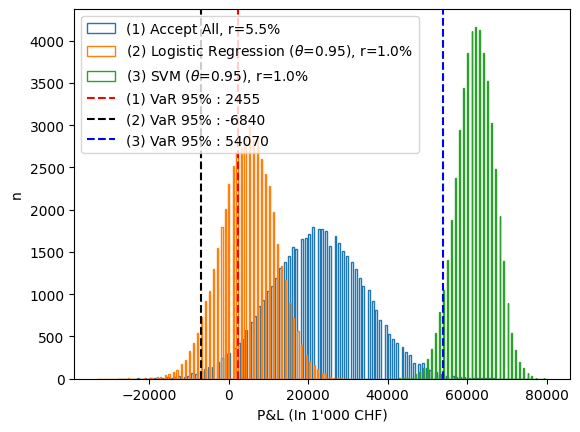

In [12]:
# Exercise 3.
np.random.seed(0)  # for reproducibility

# Set model parameters and define matrix D
P = 1_000
k_2 = 50_000
n_bins = int(np.sqrt(k_2))
big_epsilon = np.random.uniform(0,1,(n,k_2))
p_2 = p2(x_test[:,0],x_test[:,1],x_test[:,2])
D = (big_epsilon<=p_2[:,None]).astype(int)

# Scenario 1:
# Define Portfolio and possible outcomes for this portfolio using matrix D
r1 = 5.5/100
pl_1 = sum(D==1)*(r1*P)-sum(D==0)*P  # assuming Flat Simple interest rates
VaR95 = np.quantile(pl_1,0.05)
plt.hist(pl_1,histtype='step',label="(1) Accept All, r=5.5%",bins=n_bins)
plt.xlabel("P&L (In 1'000 CHF)")


# Plot histogram of profits and losses


# Calculate expected profit and losses and 95%-VaR

def outcome(D,p_hat,criteria,P,r):
    pred = (p_hat[:,1]>=criteria).astype(int)
    tp = sum((D==1)&(pred[:,None]==1))
    tn = sum((D==0)&(pred[:,None]==0))
    fp = sum((D==0)&(pred[:,None]==1))
    fn = sum((D==1)&(pred[:,None]==0))

    pl = tp*P*r-fp*P
    pl_hypothetical = pl-fn*P*r
    VaR95 = np.quantile(pl,0.05)
    return pl,pl_hypothetical,VaR95


# Scenario 2:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the logistic regression model
r2 = 1.0/100
criteria2 = 0.95
pl_2,pl_hypo_2,VaR95_2 = outcome(D,y2_hat_test_p,criteria2,P,r2)
plt.hist(pl_2,histtype='step',label=fr'(2) Logistic Regression ($\theta$={criteria2}), r=1.0%',bins=n_bins)


# Plot histogram of profits and losses


# Calculate expected profit and losses and 95%-VaR


# Scenario 3:
# Define Portfolio and possible outcomes using the matrix D and the predicted default probabilities from the rkhs model
r3 = 1.0/100
criteria3 = 0.95
pl_3,pl_hypo_3,VaR95_3= outcome(D,y2_hat_test_p_s,criteria3,P,r3)
plt.hist(pl_3,histtype='step',label=fr'(3) SVM ($\theta$={criteria3}), r=1.0%',bins=n_bins)
plt.axvline(x=VaR95,color='red', linestyle='--', label=f'(1) VaR 95% : {int(VaR95)}')
plt.axvline(x=VaR95_2,color='black', linestyle='--', label=f'(2) VaR 95% : {int(VaR95_2)}')
plt.axvline(x=VaR95_3,color='blue', linestyle='--', label=f'(3) VaR 95% : {int(VaR95_3)}')
plt.ylabel("n")
plt.legend(loc='upper left')
plt.show()

# Plot histogram of profits & losses (which is simply the performance of each strategy in scenario k, i.e. a profit if positive or a loss if negative)


# Calculate expected profit & losses and 95%-VaR for each strategy

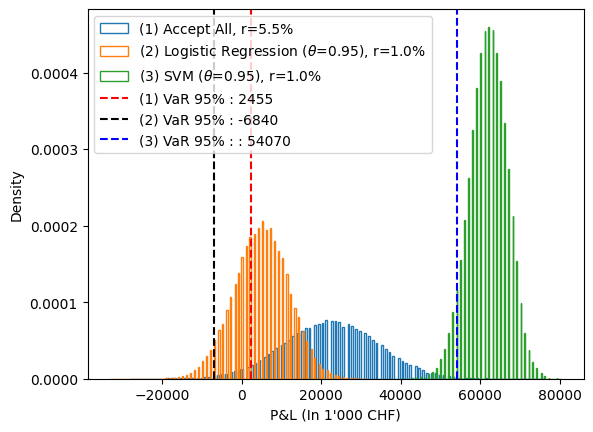

In [13]:
plt.hist(pl_1,density=True,histtype='step',label="(1) Accept All, r=5.5%",bins=n_bins)
plt.hist(pl_2,density=True,histtype='step',label=fr'(2) Logistic Regression ($\theta$={criteria2}), r=1.0%',bins=n_bins)
plt.hist(pl_3,density=True,histtype='step',label=fr'(3) SVM ($\theta$={criteria3}), r=1.0%',bins=n_bins)
plt.axvline(x=VaR95,color='red', linestyle='--', label=f'(1) VaR 95% : {int(VaR95)}')
plt.axvline(x=VaR95_2,color='black', linestyle='--', label=f'(2) VaR 95% : {int(VaR95_2)}')
plt.axvline(x=VaR95_3,color='blue', linestyle='--', label=f'(3) VaR 95% : : {int(VaR95_3)}')
plt.ylabel("Density")
plt.xlabel("P&L (In 1'000 CHF)")
plt.legend(loc='upper left')
plt.show()


**Notes on exercise 3**

As can be seen above the best peformance in terms of P&L at $\theta=0.95$, is obviously obtained via the Support Vector Machine, not only does it yield to higher center in terms of P&L (expected P&L) its density is also much narrower, therefore, it carries less risk in terms of P&L (it is less volatile).

This could be further optimized via the following formula (assuming flat simple interest, same principal across loans, time independence, one loan type, no recovery)

$$\argmax_{\theta} (\text{tp}(\theta) P r - \text{fp}(\theta) P + \delta \text{fn}(\theta) P r) \quad \text{s.t} \,\, \theta \in [0,1] \,\, \text{and} \,\, \sigma^2 \leq C$$

where $\theta$ refers to the decision threshold, tp,fp,$\delta\text{fn}$ are True Positives, False Positive and False Negatives (signal) respectfully, $P$ is the principal amount per loan, $r$ is the flat simple interest rate, $\sigma^2$ is the variance of the P&L and $C$ is some predefined cap on the variance. Furthermore, in practice it should be considered to add a regularization term to avoid overfitting.
